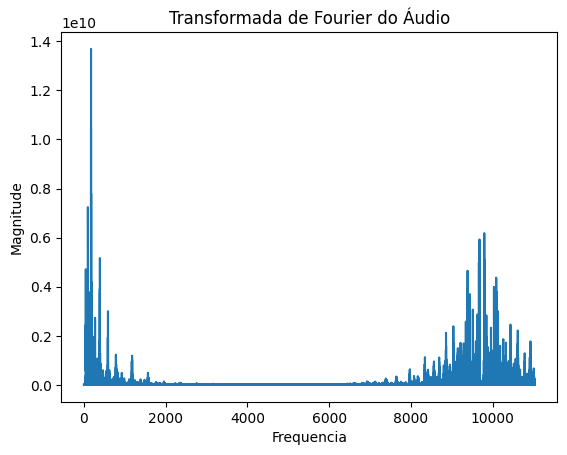

In [1]:
import scipy.io.wavfile as scipy
import matplotlib.pyplot as plt
import numpy as np

# Carrega o arquivo de áudio
taxa_amostragem, audioSample = scipy.read("ImperialPlusCantina.wav")

# Calcula a duração em segundos
duration = len(audioSample) / taxa_amostragem

# Calcula o tamanho da amostra de áudio
sizeAudioSample = len(audioSample)

# Calcula a Transformada de Fourier
fftAudioSample = np.abs(np.fft.rfft(audioSample))**2 / sizeAudioSample

# Calcula as frequências correspondentes à transformada de Fourier
fftFreqAudioSample = np.fft.rfftfreq(sizeAudioSample, d=1/taxa_amostragem)

# Plota o gráfico
plt.plot(fftFreqAudioSample, fftAudioSample)
plt.ylabel("Magnitude")
plt.xlabel("Frequencia")
plt.title("Transformada de Fourier do Áudio")
plt.show()


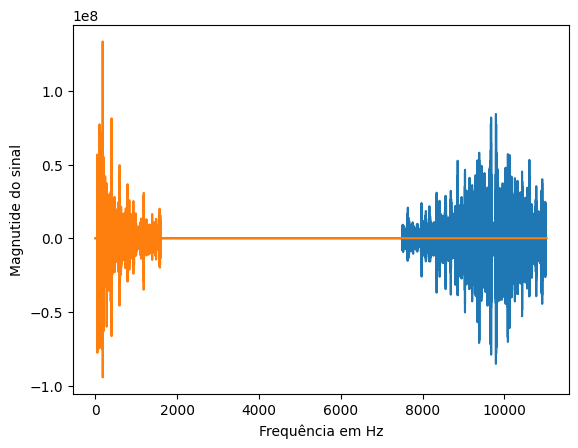

In [3]:
import scipy.io.wavfile as scipy
import numpy as np

# Carrega o arquivo de áudio
taxa_amostragem, audioSample = scipy.read("ImperialPlusCantina.wav")

# Calcula o tamanho da amostra de áudio
sizeAudioSample = len(audioSample)

# Calcula a Transformada de Fourier
fftAudioSample = np.fft.rfft(audioSample)

# Copia a transformada para fazer a separação do dois audios
fftAudioSampleCopy = np.copy(fftAudioSample)

# Define as frequencias de corte para pegar o aúdio do Star Wars
cutoff_low = 40
cutoff_high = 1600
fftAudioSample[:int(cutoff_low*sizeAudioSample/taxa_amostragem)] = 0
fftAudioSample[int(cutoff_high*sizeAudioSample/taxa_amostragem):] = 0

# Aplica a Transformada Inversa de Fourier para obter o sinal filtrado
filtered_audio = np.fft.irfft(fftAudioSample)

# Salva o sinal filtrado como um novo arquivo de áudio
scipy.write("ImperialPlusCantina_filtrado.wav", taxa_amostragem, np.int16(filtered_audio))

# Define as frequencias de corte para pegar o aúdio de sobreposição
cutoff_low = 7500
cutoff_high = 11000
fftAudioSampleCopy[:int(cutoff_low*sizeAudioSample/taxa_amostragem)] = 0
fftAudioSampleCopy[int(cutoff_high*sizeAudioSample/taxa_amostragem):] = 0

# Aplica a Transformada Inversa de Fourier para obter o sinal filtrado
filtered_audio = np.fft.irfft(fftAudioSampleCopy)

plt.xlabel("Frequência em Hz")
plt.ylabel("Magnutide do sinal")
plt.plot(fftFreqAudioSample,fftAudioSampleCopy)
plt.plot(fftFreqAudioSample, fftAudioSample)

# Salva o sinal filtrado como um novo arquivo de áudio
scipy.write("Musica_Sobreposta.wav", taxa_amostragem, np.int16(filtered_audio))
